In [197]:
import pandas as pd
import numpy as np

In [198]:
# import data
wine_data_path = "wine.csv"
data = pd.read_csv(wine_data_path)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [200]:
# replace good/bad with number 1/0
# Defining the map function
#def binary_map(x):
#    return x.map({'good': 1.0, "bad": 0.0})


#data[["quality"]] = data[["quality"]].apply(binary_map)


data[["quality"]] = data[["quality"]].replace({'good': 1.0, "bad": 0.0})
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0.0


In [201]:
# check for missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

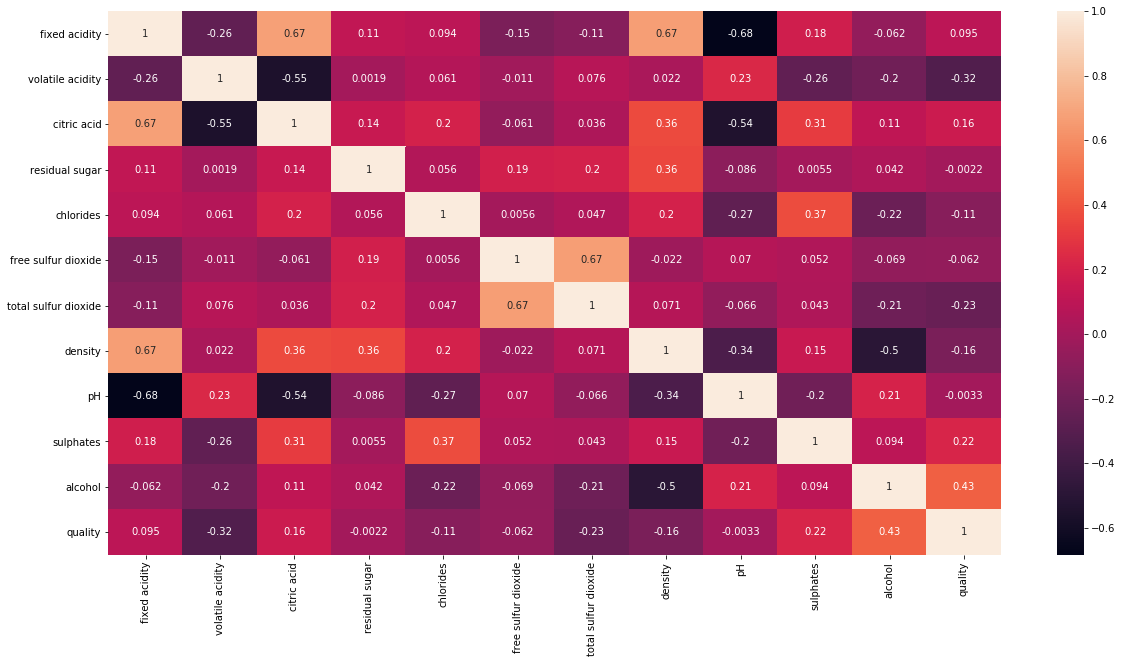

In [202]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [203]:
data = data.drop(["fixed acidity"],axis = 1)

In [204]:
# separate label and features
Y = data['quality']
data = data.drop("quality",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   residual sugar        1599 non-null   float64
 3   chlorides             1599 non-null   float64
 4   free sulfur dioxide   1599 non-null   float64
 5   total sulfur dioxide  1599 non-null   float64
 6   density               1599 non-null   float64
 7   pH                    1599 non-null   float64
 8   sulphates             1599 non-null   float64
 9   alcohol               1599 non-null   float64
dtypes: float64(10)
memory usage: 125.0 KB


In [205]:
from sklearn.model_selection import train_test_split

In [206]:
X_train_split, X_test_split,Y_train_split, Y_test_split = train_test_split(data,Y,train_size=0.7,test_size=0.3,random_state=100)
X_train_split.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
858,0.28,0.47,1.70,0.054,17.0,32.0,0.99686,3.15,0.67,10.6
654,0.47,0.47,2.40,0.074,7.0,29.0,0.99790,3.08,0.46,9.5
721,0.48,0.24,2.85,0.094,35.0,106.0,0.99820,3.10,0.53,9.2
176,0.38,0.21,2.00,0.080,7.0,35.0,0.99610,3.33,0.47,9.5
692,0.49,0.51,2.00,0.422,16.0,62.0,0.99790,3.03,1.17,9.0


In [207]:
from sklearn.preprocessing import StandardScaler

In [208]:
cols = list(X_train_split.columns)
print(cols)

['volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [209]:
scaler = StandardScaler()
X_train_split[cols] = scaler.fit_transform(X_train_split[cols])
X_train_split.head()

/Users/yashwanthkumar/opt/anaconda3/envs/mlpy36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yashwanthkumar/opt/anaconda3/envs/mlpy36/lib/python3.6/site-packages/pandas/core/frame.py:3072: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/Users/yashwanthkumar/opt/anaconda3/envs/mlpy36/lib/python3.6/site-packages/pandas/core/frame.py:3037: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveat

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
858,-1.408936,1.019093,-0.567938,-0.711893,0.107203,-0.434423,0.050325,-1.012790,0.082530,0.197850
654,-0.360647,1.019093,-0.097280,-0.303512,-0.844865,-0.527005,0.595992,-1.457849,-1.188356,-0.844746
721,-0.305474,-0.145527,0.205286,0.104869,1.820927,1.849276,0.753396,-1.330689,-0.764728,-1.129091
176,-0.857205,-0.297433,-0.366228,-0.180998,-0.844865,-0.341840,-0.348431,0.131648,-1.127838,-0.844746
692,-0.250301,1.221635,-0.366228,6.802317,0.011997,0.491401,0.595992,-1.775749,3.108450,-1.318654


In [210]:
import statsmodels.api as sm

In [211]:
sum(Y_train_split)/len(Y_train_split)*100

53.529937444146555

In [212]:
X_train_split_sm = sm.add_constant(X_train_split)
logistic_reg = sm.GLM(Y_train_split,X_train_split_sm,sm.families.Binomial())
model = logistic_reg.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                quality   No. Observations:                 1119
Model:                            GLM   Df Residuals:                     1108
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -572.39
Date:                Thu, 21 Jan 2021   Deviance:                       1144.8
Time:                        11:39:31   Pearson chi2:                 1.09e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2601      0.076      3.442      0.001       0.112       0.408
volatile acidity        -0.5687      0.102     -5.554      0.000      -0.769      -0.368
citric acid             -0.2233      0.122     -1.830      0.067      -0.462       0.016
residual sugar           0.1314      0.083      1.577      0.115      -0.032       0.295
chlorides               -0.2153      0.088     -2.446      0.014      -0.388      -0.043
free sulfur dioxide      0.1956      0.105      1.862      0.063      -0.010       0.402
total sulfur dioxide    -0.5808      0.112     -5.172      0.000      -0.801      -0.361
density                  0.0044      0.118      0.037      0.970      -0.227       0.236
pH                      -0.1984      0.092     -2.168      0.030      -0.378      -0.019
sulphates                0.4578      0.093      4.945      0.000       0.276       0.639
alcohol                  1.0495      0.121      8.707      0.000       0.813       1.286
========================================================================================
"""

In [161]:
y_pred = model.predict(X_train_split_sm)
y_pred = y_pred.values.reshape(-1)
y_pred_orginal = list(y_pred)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0
print(y_pred)
print(y_pred_orginal)

[1. 0. 0. ... 0. 0. 1.]
[0.8770975970546125, 0.25328427909575363, 0.16481080459905562, 0.35271766428486595, 0.21652388576806844, 0.9250408937782337, 0.8978405478250069, 0.38487853521912024, 0.8361004046722175, 0.42229626298998274, 0.3694457364754062, 0.19747265558707192, 0.9564576285413231, 0.4003832290652959, 0.2656363580519564, 0.16748377503854012, 0.34765859282678757, 0.9614604326321063, 0.12175956258666312, 0.3523004039729188, 0.14978373168395506, 0.08939831378066686, 0.797717364878062, 0.2242413162036468, 0.3296728873006966, 0.5203380816503883, 0.6149766459694849, 0.9540143343581373, 0.1939105495542325, 0.617708165199027, 0.2832695014324908, 0.3744279026736699, 0.90800477931649, 0.9056464276168394, 0.858797862603261, 0.7841689813523787, 0.15803993545973374, 0.4156480973826723, 0.8383836302513203, 0.8156397419529259, 0.8304992150680516, 0.7848104745959139, 0.3421677479821783, 0.19825282548792883, 0.9518716309725581, 0.9136512554866143, 0.9504323825258145, 0.973846765255369, 0.79859

In [133]:
# Evaluation
from sklearn import metrics


In [134]:

cm = metrics.confusion_matrix(Y_train_split,y_pred)
print(cm)

[[388 132]
 [141 458]]


In [ ]:
"""
Actual    Predicted
          
       |  Bad  | Good

 Bad   |  388  | 132
 
 Good  |  141  | 458


"""

In [135]:
TruePositive = cm[1,1] 
TrueNegative = cm[0,0]
FalsePositive = cm [0,1]
FalseNegative = cm [1,0]

In [138]:
Accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive +FalseNegative )
print(Accuracy*100)

75.60321715817693


In [139]:
Sensitivity = TruePositive / (TruePositive + FalseNegative )
print(Sensitivity)

0.7646076794657763


In [140]:
Specificity = TrueNegative / (TrueNegative  + FalsePositive)
print(Specificity)

0.7461538461538462


In [142]:
TruePositiveRate = Sensitivity
print(TruePositiveRate)

0.7646076794657763


In [141]:
FalsePositiveRate = FalsePositive / (TrueNegative + FalsePositive)
print(FalsePositiveRate)
FalsePositiveRate2 = 1- Specificity
print(FalsePositiveRate2)

0.25384615384615383
0.25384615384615383


In [143]:
# positive predictive value
PositivePredictiveValue = TruePositive / (TruePositive+FalsePositive)
print(PositivePredictiveValue)

0.7762711864406779


In [144]:
# negative predictive value
NegativePredictiveValue  = TrueNegative /(TrueNegative + FalseNegative)
print(NegativePredictiveValue)

0.7334593572778828


In [145]:
Recall = Sensitivity
print(Sensitivity)

0.7646076794657763


In [147]:
# Precision = TruePositive / (TruePositive+FalsePositive) = PositivePredictiveValue
Precision = PositivePredictiveValue
print(Precision)

0.7762711864406779


In [168]:
# Get the AUC ROC score
auc_score = metrics.roc_auc_score(Y_train_split,y_pred_orginal)
print(auc_score)

0.8251797868241941


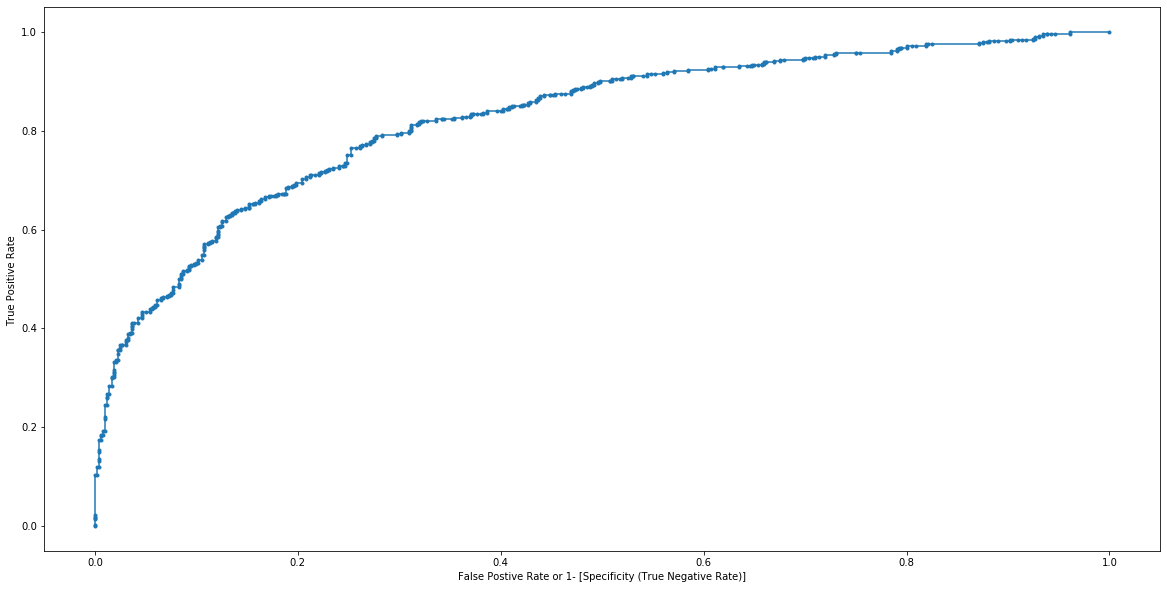

In [167]:
# Plot the ROC curve for different thresholds of output

fpr,tpr,threshold = metrics.roc_curve(Y_train_split,y_pred_orginal)
plt.figure(figsize = (20,10))
plt.plot(fpr,tpr,marker=".",label = "ROC Curve")
plt.xlabel("False Postive Rate or 1- [Specificity (True Negative Rate)]")
plt.ylabel("True Positive Rate ")
plt.show()

In [170]:
prediction_df = pd.DataFrame({"Actual":Y_train_split,"Pred":y_pred_orginal})
prediction_df.head()

,Actual,Pred
858,1.0,0.877098
654,0.0,0.253284
721,0.0,0.164811
176,0.0,0.352718
692,0.0,0.216524


In [178]:
# create the labels for thresholds form 0.0 to 0.9
nums = [float(x/10) for x in range(10)]
print(nums)



for num in nums:
    prediction_df[num] = prediction_df.Pred.apply(lambda x : 1 if x > num else 0)
prediction_df.head()

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


,Actual,Pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
858,1.0,0.877098,1,1,1,1,1,1,1,1,1,0
654,0.0,0.253284,1,1,1,0,0,0,0,0,0,0
721,0.0,0.164811,1,1,0,0,0,0,0,0,0,0
176,0.0,0.352718,1,1,1,1,0,0,0,0,0,0
692,0.0,0.216524,1,1,1,0,0,0,0,0,0,0


In [179]:
metrics_df = pd.DataFrame(columns = ["prob","acc","sensitivity","specificity"])

for i in nums:
    cm = metrics.confusion_matrix(prediction_df["Actual"],prediction_df[i])
    TruePositive = cm[1,1] 
    TrueNegative = cm[0,0]
    FalsePositive = cm [0,1]
    FalseNegative = cm [1,0]
    accuracy = (TruePositive + TrueNegative) / (TruePositive + TrueNegative + FalsePositive + FalseNegative)
    sensitivity = TruePositive / (TruePositive + FalseNegative)
    specificity = TrueNegative / (TrueNegative + FalsePositive)
    metrics_df.loc[i] = [i,accuracy,sensitivity,specificity]
    
metrics_df

,prob,acc,sensitivity,specificity
0.0,0.0,0.535299,1.000000,0.000000
0.1,0.1,0.562109,0.993322,0.065385
0.2,0.2,0.638070,0.953255,0.275000
0.3,0.3,0.704200,0.906511,0.471154
0.4,0.4,0.738159,0.834725,0.626923
0.5,0.5,0.756032,0.764608,0.746154
0.6,0.6,0.739053,0.667780,0.821154
0.7,0.7,0.707775,0.547579,0.892308
0.8,0.8,0.673816,0.430718,0.953846
0.9,0.9,0.583557,0.230384,0.990385


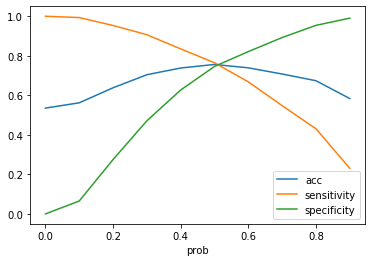

In [180]:
metrics_df.plot.line(x = "prob", y = ["acc","sensitivity","specificity"])
plt.show()

In [ ]:
# Sensitivity and Specificity meet at prob = 0.5
# So we can choose threshold 0.5


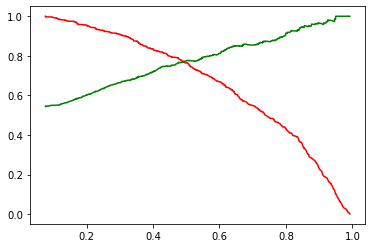

In [185]:
# Precision - Recall curve
precision, recall , threshold = metrics.precision_recall_curve(Y_train_split,y_pred_orginal)

f1score = (1/precision[:-1] )+ (1/recall[:-1])

plt.plot(threshold,precision[:-1],"g-")

plt.plot(threshold,recall[:-1],"r-",label = "Precision - Recall Curve")
plt.show()

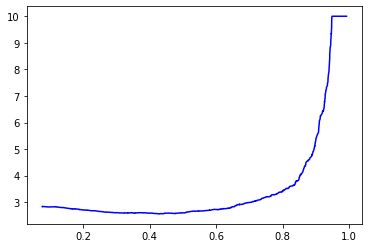

In [190]:
#print(f1score)
f1score[f1score>10] =10
plt.plot(threshold,f1score,"b-")
plt.show()

In [ ]:
# here also the threshold is 0.5 as precision and recall meet at the point


In [ ]:


# read data
# feature engineering
# Train Model
# Evaluate model